# Forecasting House Sales Prices in Ames, Iowa: A Predictive Model based on Features and Proximity to Main Infrastructures

**Putranegara Riauwindu**, putrangr@bu.edu 

**Abstract:**

This project presents the development of a predictive model for forecasting house sales prices in Ames, Iowa. The model utilizes essential house features, such as the number of bedrooms, bathrooms, and basement, in combination with the proximity to main infrastructure, such as roads and railways.

To construct and evaluate the model, we employ the comprehensive Ames Housing dataset compiled by Dean De Cock (accessible through this link : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The forecasting mechanism leverages the Multiple Linear Regression algorithms, which considers the selected features' collective impact on the predicted response. For enhanced accuracy, the Stepwise Regression technique is utilized for feature selection, identifying the most significant contributors. Please note that the Ames Housing dataset comes with two separate file of train and test set. We will use train set to build the model and find the model with best performance and make prediction of house SalePrice in Ames using of the best model on the test set.

To ensure dataset reliability and integrity without compromising the dataset originality by minimizing bias, missing values within the dataset will only be imputed if the missing value does not exceed 10% out of all available value within that particular columns. Imputation will employ Multiple Linear Regression for continous variables and k Nearest Neighbors for categorical/ordinal variables. We will use the combination of matplotlib, seaborn, and plotly as a means of visualizing the analysis and model (if necessary).

The final output is a Multiple Linear Regression Model capable of predicting house sales prices in Ames based on specified features. This model offers valuable insights for prospective buyers and sellers in the Ames, Iowa real estate market.

**Keywords**: Predictive Model, House Sales Prices, Ames, Iowa, House Features, Proximity, Infrastructure, Multiple Linear Regression, Stepwise Regression, Imputation, KNN.

## 1. Importing Relevant Packages and Configuring Initial Setting for Jupyter Notebook

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import missingno as msno
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import time
from sklearn.impute import SimpleImputer
from mlxtend.feature_selection import SequentialFeatureSelector

# Output Display Setting
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
warnings.filterwarnings("ignore", category=UserWarning)

**Setting Plotly Display Configuration**

In [2]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

## 2. Importing and Handling Missing Value in Training Dataset

### 2.1 Importing Dataset into Python Environment

In [3]:
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

The training dataset contains 1460 observations with 80 total feature columns (excluding the response column which is the 'SalePrice'.

We will now proceed to check whether there are missing values in the training set.

### 2.2 Checking for Missing Value

In [5]:
# Calculating missing value for all of the columns
missing_values = data.isna().sum()/data.shape[0]

# Filter columns with more than 0 missing values
columns_with_missing = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the filtered result
print(columns_with_missing)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


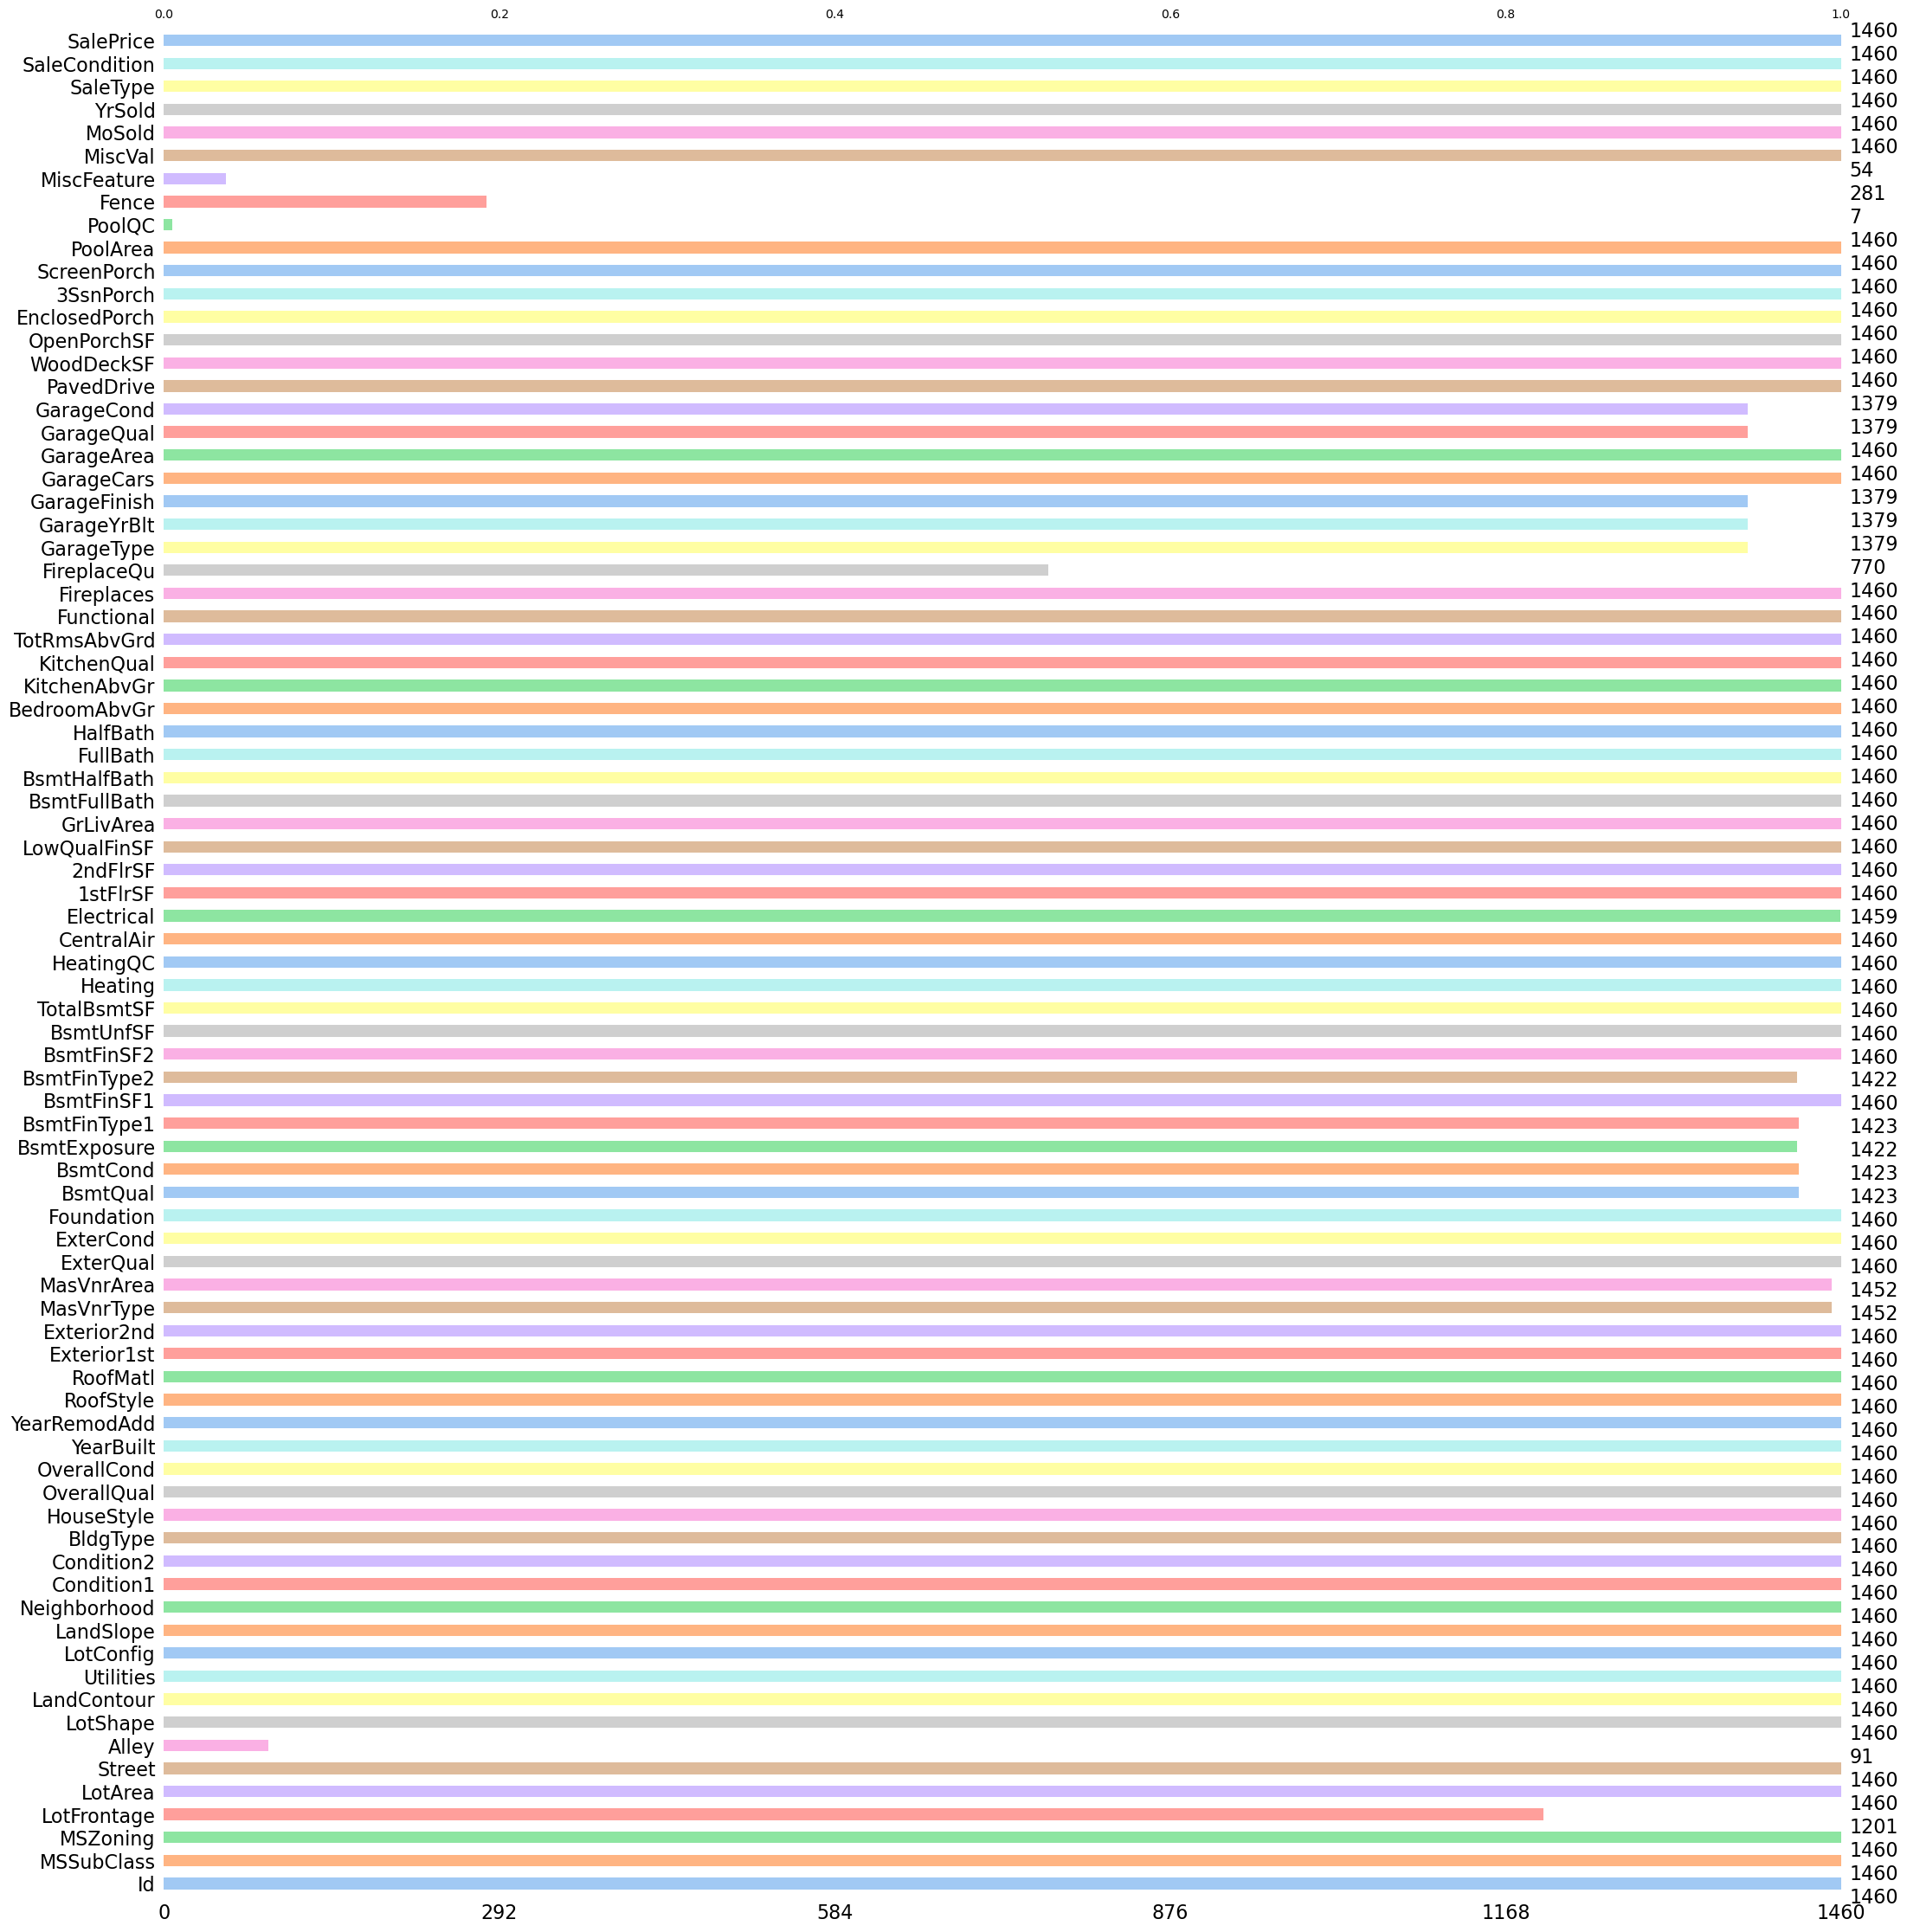

In [6]:
# Visualizing the training dataset missing values
pastel_colors = sns.color_palette("pastel")
msno.bar(data, color=pastel_colors)
plt.show()

The plot and calculation above showed that there are severals columns identified to having multiple missing values which are:

1. PoolQC 
2. MiscFeature 
3. Alley 
4. Fence 
5. FireplaceQu 
6. LotFrontage 
7. GarageYrBlt
8. GarageCond: Garage condition 
9. GarageType: Garage location 
10. GarageFinish: Interior finish of the garage  
11. GarageQual: Garage quality 
12. BsmtFinType2: Rating of basement finished area (if multiple types) 
13. BsmtExposure: Refers to walkout or garden level walls 
14. BsmtQual: Evaluates the height of the basement 
15. BsmtCond: Evaluates the general condition of the basement 
16. BsmtFinType1: Rating of basement finished area
17. MasVnrArea: Masonry veneer area in square feet 
18. MasVnrType: Masonry veneer type
19. Electrical: electrical system

After reviewing the dataset description, it appears that only the columns **"LotFrontage" and "Electrical"** contain genuine missing values. The other columns were previously identified to have apparent missing values due to the presence of "NA" values, but these "NA" values actually indicate the unavailability of a specific feature in those particular observations. Therefore, these "NA" values are not true missing values.

In summary, the dataset has genuine missing values in **"LotFrontage" and "Electrical"**, while the "NA" values in other columns do not represent missing data but rather indicate the absence of certain features.

Due to the size of the missing values, the observations that contains missing value in column **"LotFrontage"** will be removed while the one in **"Electrical"** column will be imputed using KNN model in order to minimize bias. The missing value will be imputed first before we explore the dataset in the Exploratory Data Analysis (EDA) phase due to its only being one observation.

### 2.3 Handling Missing Value

**2.3.1 Adjusting the NA values in the column that imply the absence of that particular feature**

In [7]:
# Columns to exclude from imputation
exclude_columns = ['LotFrontage', 'Electrical', 'MasVnrArea', 'GarageYrBlt']
zero_columns = ['MasVnrArea', 'GarageYrBlt']

# Fill missing values with "Not Available" for non-excluded columns
data[data.columns.difference(exclude_columns)] = data[data.columns.difference(exclude_columns)].fillna("Not Available")

# Fill missing values in 'MasVnrArea' and 'GarageYrBlt' with 0 as they correspond to the associated related columns
data['MasVnrArea'].fillna(0, inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)

**2.3.2 Checking whether the designated column`s missing value have been properly adjusted**

In [8]:
# List of columns with categorical nature
categorical_vars = data.select_dtypes(include='object').columns.tolist()

# Loop through each categorical column and print unique categories
for col in categorical_vars:
    num_categories = data[col].unique()
    print(f"Column '{col}' has unique categories: {num_categories}")

Column 'MSZoning' has unique categories: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column 'Street' has unique categories: ['Pave' 'Grvl']
Column 'Alley' has unique categories: ['Not Available' 'Grvl' 'Pave']
Column 'LotShape' has unique categories: ['Reg' 'IR1' 'IR2' 'IR3']
Column 'LandContour' has unique categories: ['Lvl' 'Bnk' 'Low' 'HLS']
Column 'Utilities' has unique categories: ['AllPub' 'NoSeWa']
Column 'LotConfig' has unique categories: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Column 'LandSlope' has unique categories: ['Gtl' 'Mod' 'Sev']
Column 'Neighborhood' has unique categories: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Column 'Condition1' has unique categories: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Column 'Condition2' has unique categories: ['Norm' 'Art

In [9]:
# Calculating missing value for all of the columns
missing_values = data.isna().sum()/data.shape[0]

# Filter columns with more than 0 missing values
columns_with_missing = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the filtered result
print(columns_with_missing)

LotFrontage    0.177397
Electrical     0.000685
dtype: float64


The designated columns have been properly adjusted. Now we will go over to handle the remaining missing values in the **'LotFrontage' and 'Electrical'** columns. From the information above, 'Electrical' only has 1 observation with missing value.

**2.3.3 Removing observation with missing value in "LotFrontage" columns**

In [10]:
data.dropna(subset=['LotFrontage'], inplace=True)

**2.3.4 Imputing observation with missing value in 'Electrical' column**

In [11]:
# Checking for the 'Electrical' column unique values
data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

'Electrical' column apparently has 5 different categories that describe the electrical system type for each observation. This info later confirmed by crosschecking to the dataset description.

We will build KNN Model to predict what kind of electrical system the observation with missing value in that column have.

KNN model will be built in the following sequences:

1. Observation with NA value will be isolated for the prediction making. The KNN model will be trained using the remaining data that has the 'Electrical' output label.
2. Training data (Subsetted to exclude the NA values) is then splitted into training and test set. Training set of numeric variables will be used to train the model while test set will be used to evaluate the model performance on several different k values.
3. The best model with optimum k values will then be used to predict the 'Electrical' column output in the observation with missing value.

**2.3.5 Subsetting the dataset to numeric variables only and add response column (Electrical)**

In [12]:
# Creating master data for knn modeling
knn = data.select_dtypes(include=['int64', 'float64'])
knn.drop('Id', axis=1, inplace=True)
knn['Electrical'] = data['Electrical']

**2.3.6 Separating the dataset from the observation with electrical missing value**

In [13]:
# Creating subset of dataset to be predicted
electrical_missing = knn[knn['Electrical'].isna()]
electrical_missing.drop('Electrical', axis=1, inplace=True)

In [14]:
knn.dropna(subset=['Electrical'], inplace=True)

**2.3.7 Preparing dataset for KNN Model building**

In [15]:
knn['Electrical'].value_counts()

SBrkr    1091
FuseA      80
FuseF      25
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Since 'Mix' category within the Electrical column only has 1 observation, it will not be suitable for data partitioning for model building. For this analysis, we will drop the observation with 'Electrical' value == 'Mix'.

It is also noteworthy that the naive-rate for this classification process is around 90% that will predict the SBrkr as the output label for the missing value.

In [16]:
knn = knn[knn['Electrical'] != 'Mix']

In [17]:
# Subsetting the predictor and response columns
X = knn.drop('Electrical', axis=1)
y = knn['Electrical']

**2.3.8 Training KNN Model on Training Dataset**

In [18]:
## Partitioning dataset into training and test set
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=256, stratify=y)

In [19]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [20]:
# Training KNN Model with initial k=3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

**2.3.9 Finding the optimum number of K through Accuracy measure**

In [21]:
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy_results = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    classifier.fit(X_train_sc, y_train)
    y_pred = classifier.predict(X_test_sc)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append((k, accuracy))

print(accuracy_results)

[(3, 0.8805555555555555), (5, 0.8861111111111111), (7, 0.8972222222222223), (9, 0.9083333333333333), (11, 0.9138888888888889), (13, 0.9138888888888889), (15, 0.9138888888888889), (17, 0.9138888888888889), (19, 0.9138888888888889), (21, 0.9138888888888889)]


The accuracy measures returned that k=11 is the best k with the highest accuracy at 0.91. We will build the KNN model with k=11 and make prediction for the missing value.

In [22]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=11)

**2.3.10 Making prediction on the missing value of Electrical column and imputing it to the original training dataset**

In [23]:
scaler = StandardScaler()
electrical_missing_sc = scaler.fit_transform(electrical_missing)
y_pred_electrical = classifier.predict(electrical_missing_sc)

In [24]:
y_pred_electrical

array(['SBrkr'], dtype=object)

In [25]:
data['Electrical'].fillna('SBrkr', inplace=True)

In [26]:
data.isna().sum().any()

False

All missing values have been imputed and cleaned ready for the Multiple Linear Regression modeling to predict the sales price of each of the houses.

## 3. Preparing Training Dataset for EDA and MLR Modeling

### 3.1 Setting Id Column as Index

In [27]:
data.set_index('Id', inplace=True)

### 3.2 Subsetting the Training Dataset into Features and Response

In [28]:
# Features
X = data.drop(columns=['SalePrice'])
# Response
y = data['SalePrice']

### 3.3 Grouping The Numeric and Categorical Features For Ease of Analysis

In [29]:
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object'])

Lets check whether the features have been properly grouped or not.

In [30]:
categorical_features.head()

MSZoning Street          Alley LotShape LandContour Utilities LotConfig  \
Id                                                                           
1        RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
2        RL   Pave  Not Available      Reg         Lvl    AllPub       FR2   
3        RL   Pave  Not Available      IR1         Lvl    AllPub    Inside   
4        RL   Pave  Not Available      IR1         Lvl    AllPub    Corner   
5        RL   Pave  Not Available      IR1         Lvl    AllPub       FR2   

   LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
Id                                                                              
1        Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
2        Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
3        Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
4        Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
5        Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
Id                                                                              
1   CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
2   CompShg     MetalSd     MetalSd       None        TA        TA     CBlock   
3   CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
4   CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil   
5   CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

   BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
Id                                                                              
1        Gd       TA           No          GLQ          Unf    GasA        Ex   
2        Gd       TA           Gd          ALQ          Unf    GasA        Ex   
3        Gd       TA           Mn          GLQ          Unf    GasA        Ex   
4        TA       Gd           No          ALQ          Unf    GasA        Gd   
5        Gd       TA           Av          GLQ          Unf    GasA        Ex   

   CentralAir Electrical KitchenQual Functional    FireplaceQu GarageType  \
Id                                                                          
1           Y      SBrkr          Gd        Typ  Not Available     Attchd   
2           Y      SBrkr          TA        Typ             TA     Attchd   
3           Y      SBrkr          Gd        Typ             TA     Attchd   
4           Y      SBrkr          Gd        Typ             Gd     Detchd   
5           Y      SBrkr          Gd        Typ             TA     Attchd   

   GarageFinish GarageQual GarageCond PavedDrive         PoolQC  \
Id                                                                
1           RFn         TA         TA          Y  Not Available   
2           RFn         TA         TA          Y  Not Available   
3           RFn         TA         TA          Y  Not Available   
4           Unf         TA         TA          Y  Not Available   
5           RFn         TA         TA          Y  Not Available   

            Fence    MiscFeature SaleType SaleCondition  
Id                                                       
1   Not Available  Not Available       WD        Normal  
2   Not Available  Not Available       WD        Normal  
3   Not Available  Not Available       WD        Normal  
4   Not Available  Not Available       WD       Abnorml  
5   Not Available  Not Available       WD        Normal

Categorical features seem to be properly grouped after cross-checking it with the dataset description, now let`s check for the numeric features.

In [31]:
numeric_features.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           2003       196.0         706           0        150          856   
2           1976         0.0         978           0        284         1262   
3           2002       162.0         486           0        434          920   
4           1970         0.0         216           0        540          756   
5           2000       350.0         655           0        490         1145   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   
2       1262         0             0       1262             0             1   
3        920       866             0       1786             1             0   
4        961       756             0       1717             1             0   
5       1145      1053             0       2198             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                             
1          2         1             3             1             8           0   
2          2         0             3             1             6           1   
3          2         1             3             1             6           1   
4          1         0             3             1             7           1   
5          2         1             4             1             9           1   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                 
1        2003.0           2         548           0           61   
2        1976.0           2         460         298            0   
3        2001.0           2         608           0           42   
4        1998.0           3         642           0           35   
5        2000.0           3         836         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
Id                                                                            
1               0          0            0         0        0       2    2008  
2               0          0            0         0        0       5    2007  
3               0          0            0         0        0       9    2008  
4             272          0            0         0        0       2    2006  
5               0          0            0         0        0      12    2008

It seems that there are couples of features identified as numeric but are actually categorical/ordinal in nature as per the dataset description. That features are **'MSSubClass', 'OverallQual', 'OverallCond', and 'MoSold'**.

For this analysis, **'MSSubClass', 'OverallQual', 'OverallCond'** features will be converted to categorical and moved into categorical_features, while **'MoSold'** will be removed as it is redundant information provided by **'YrSold'**.

In [32]:
numeric_features[['MSSubClass', 'OverallQual', 'OverallCond']] = numeric_features[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
categorical_features[['MSSubClass', 'OverallQual', 'OverallCond']] = numeric_features[['MSSubClass', 'OverallQual', 'OverallCond']]
numeric_features.drop(columns=['MoSold', 'MSSubClass', 'OverallQual', 'OverallCond'], inplace=True)

## 4. Exploratory Data Analysis

Now let us explore the relationship between the features and response to see whether there are any interesting or discernable pattern through the plotting of each of the features against the response. 

For this objective, response will be plotted against numeric features and categorical features separately.

### 4.1 Sale Price vs Numerical Features Relationship

**4.1.1 Sale Price vs Numerical Features Scatterplot**

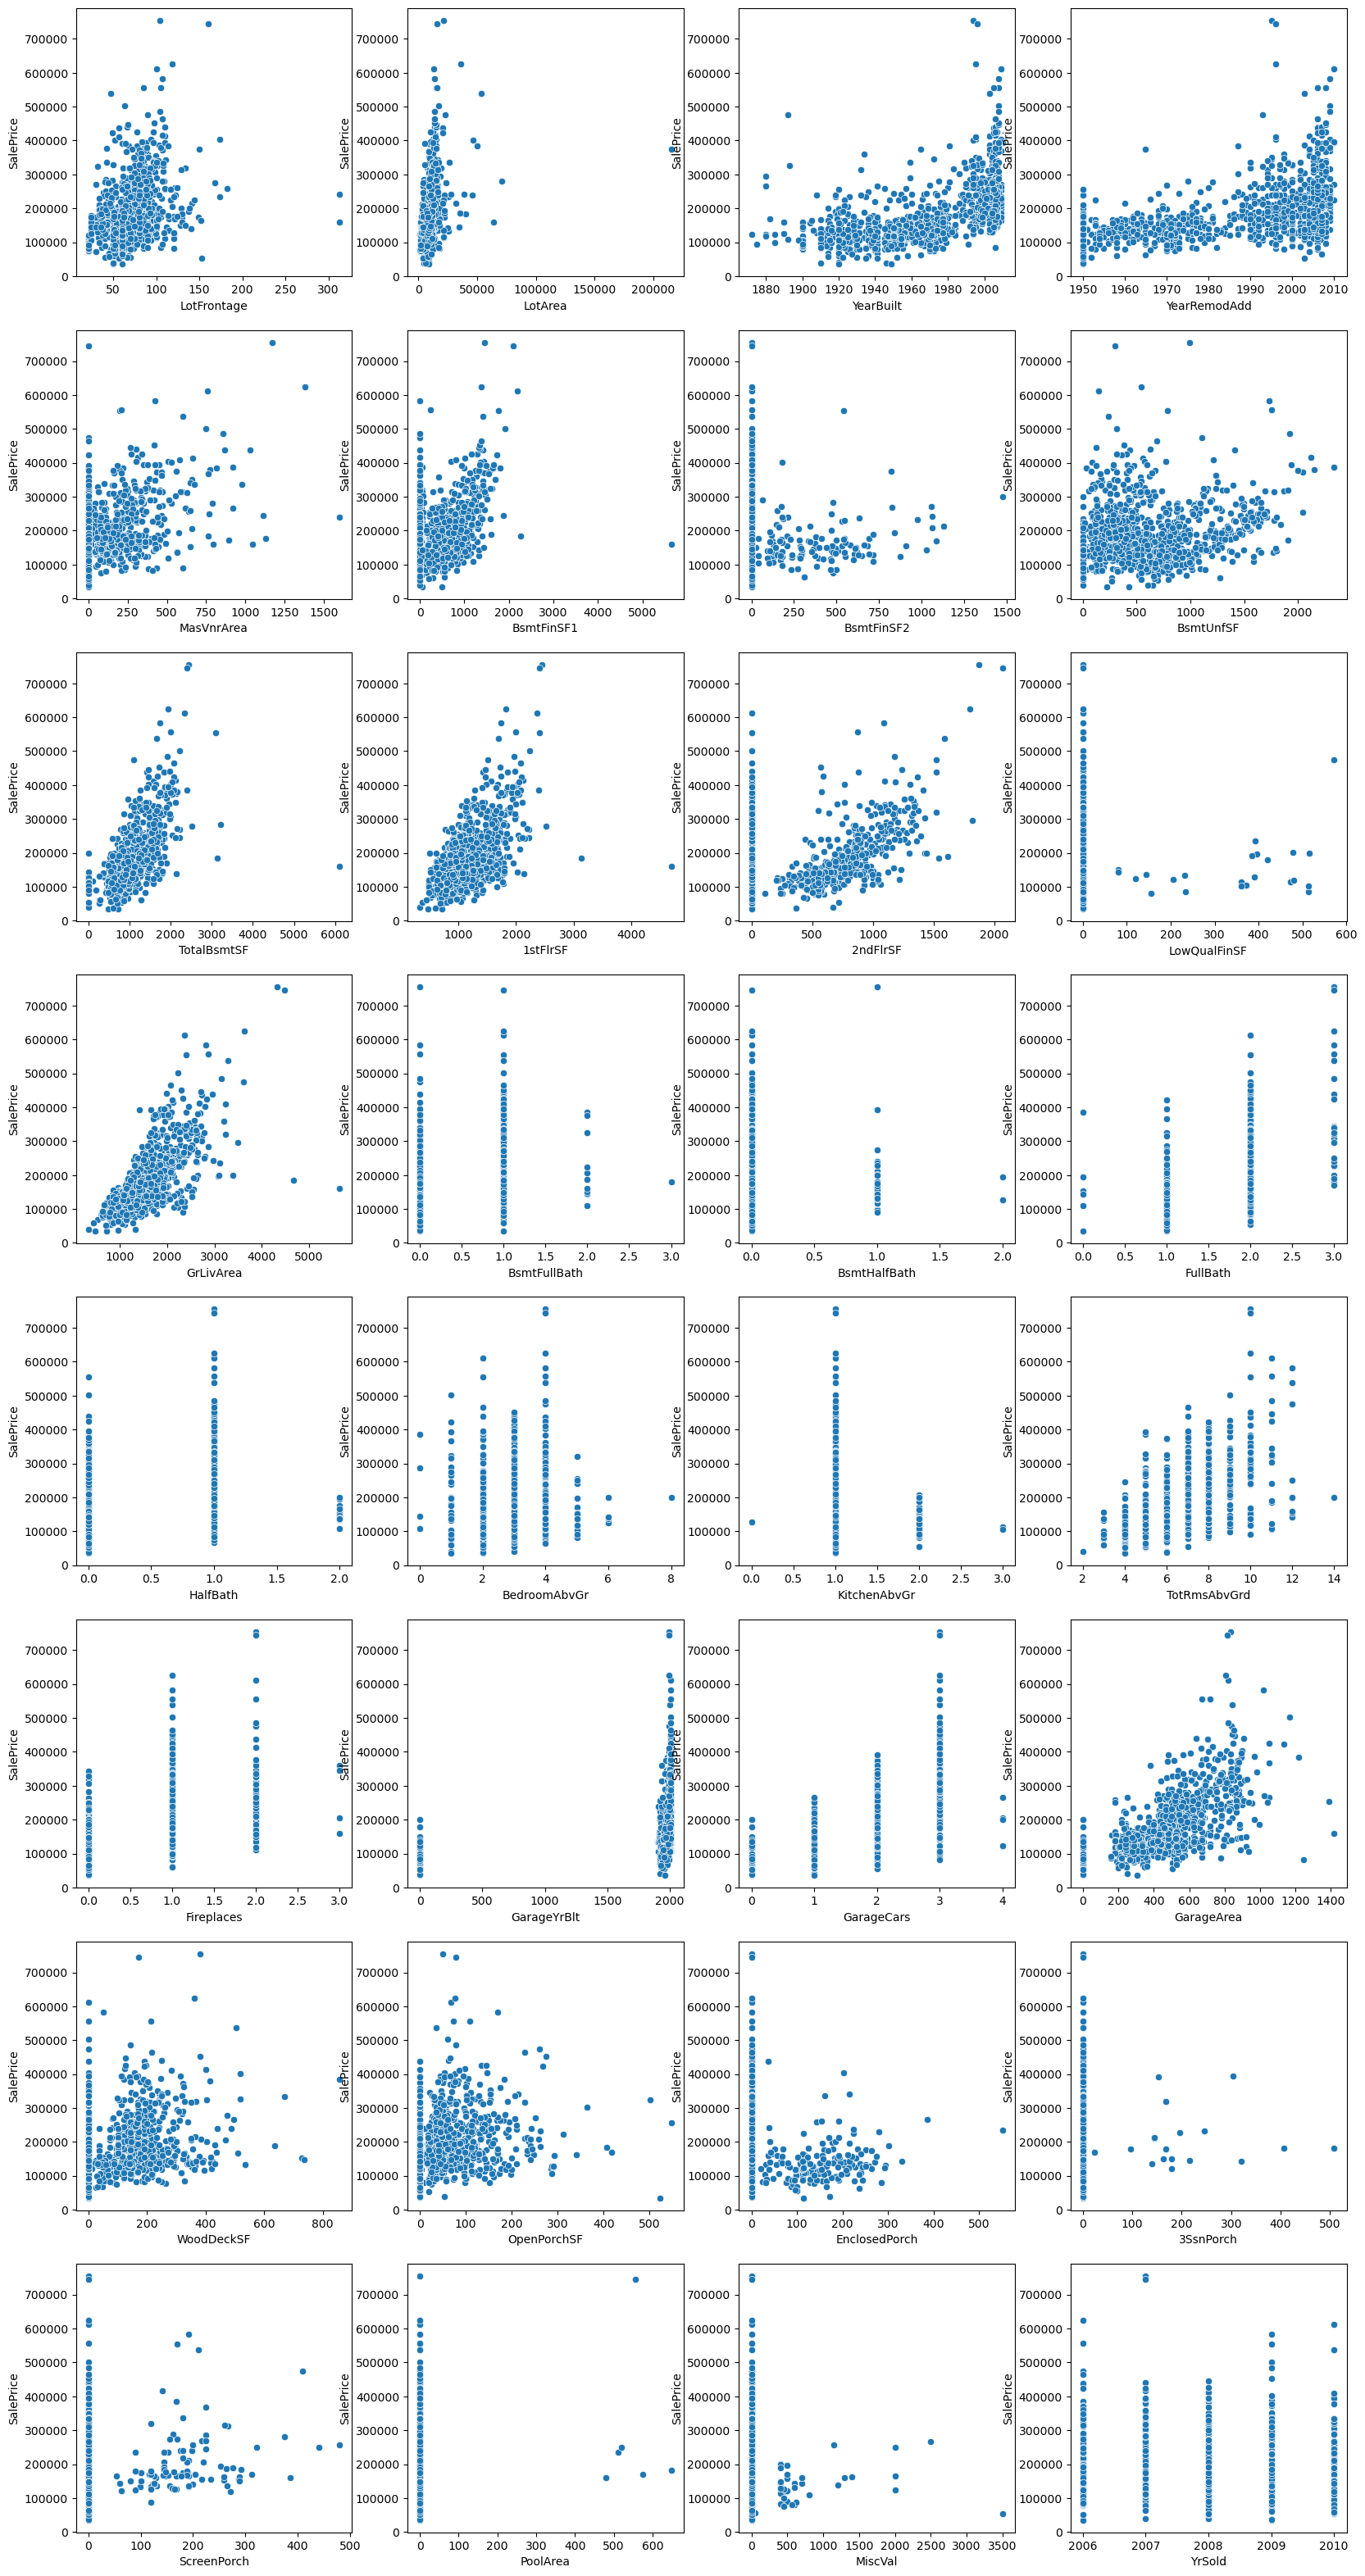

In [33]:
# Set the number of columns for the grid
num_columns = 4

# Calculate the number of rows needed to accommodate all features
num_features = numeric_features.shape[1]
num_rows = (num_features - 1) // num_columns + 1

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = [axes]

# Plot pairwise scatterplots
for i, column in enumerate(numeric_features.columns):
    sns.scatterplot(x=column, y='SalePrice', data=numeric_features.join(y), ax=axes[i // num_columns, i % num_columns])

# Remove any empty subplots
for i in range(num_features, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

From the plot above, we could see that the majority of the numerical features, although some of the features does not exhibit clear relationship, has somewhat linear relationship with the SalePrice, hinting that Multiple Linear Regression might be the good choice of algorithm to use to predict the response value. We will now check the correlation value between the SalePrice and Numeric Features to confirm the findings.

**4.1.2 Sale Price vs Numerical Features Correlation**

In [34]:
# Calculate the correlation matrix between SalePrice and Numerical Features
sale_numfeatures_corr = numeric_features.join(y).corr()
sale_numfeatures_corr = sale_numfeatures_corr['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')
sale_numfeatures_corr

GrLivArea        0.703557
GarageCars       0.647302
GarageArea       0.631761
TotalBsmtSF      0.626977
1stFlrSF         0.620159
FullBath         0.566800
YearBuilt        0.538913
TotRmsAbvGrd     0.537215
YearRemodAdd     0.519471
MasVnrArea       0.492084
Fireplaces       0.479353
BsmtFinSF1       0.403195
LotFrontage      0.351799
WoodDeckSF       0.345054
OpenPorchSF      0.326530
LotArea          0.311416
2ndFlrSF         0.308957
HalfBath         0.284770
GarageYrBlt      0.262026
BsmtFullBath     0.237637
BsmtUnfSF        0.215044
BedroomAbvGr     0.164554
EnclosedPorch    0.164004
KitchenAbvGr     0.140626
ScreenPorch      0.121166
PoolArea         0.092924
MiscVal          0.049435
3SsnPorch        0.035755
BsmtHalfBath     0.028450
LowQualFinSF     0.022339
YrSold           0.020601
BsmtFinSF2       0.017682
Name: SalePrice, dtype: float64

The majority of numerical features show a relatively strong linear relationship, either positive or negative, with the SalePrice. However, there are a few features that seem to be indifferent, namely **'PoolArea', 'MiscVal', '3SsnPorch', 'BsmtHalfBath', 'LowQualFinSF', 'YrSold', and 'BsmtFinSF2'**. These features will be taken into consideration for the feature selection in the later section.

Now we will investigate visually the relationship between the SalePrice and the categorical features to see whether there are any meaningful relationship between them.

### 4.2 Sale Price vs Categorical Features Relationship

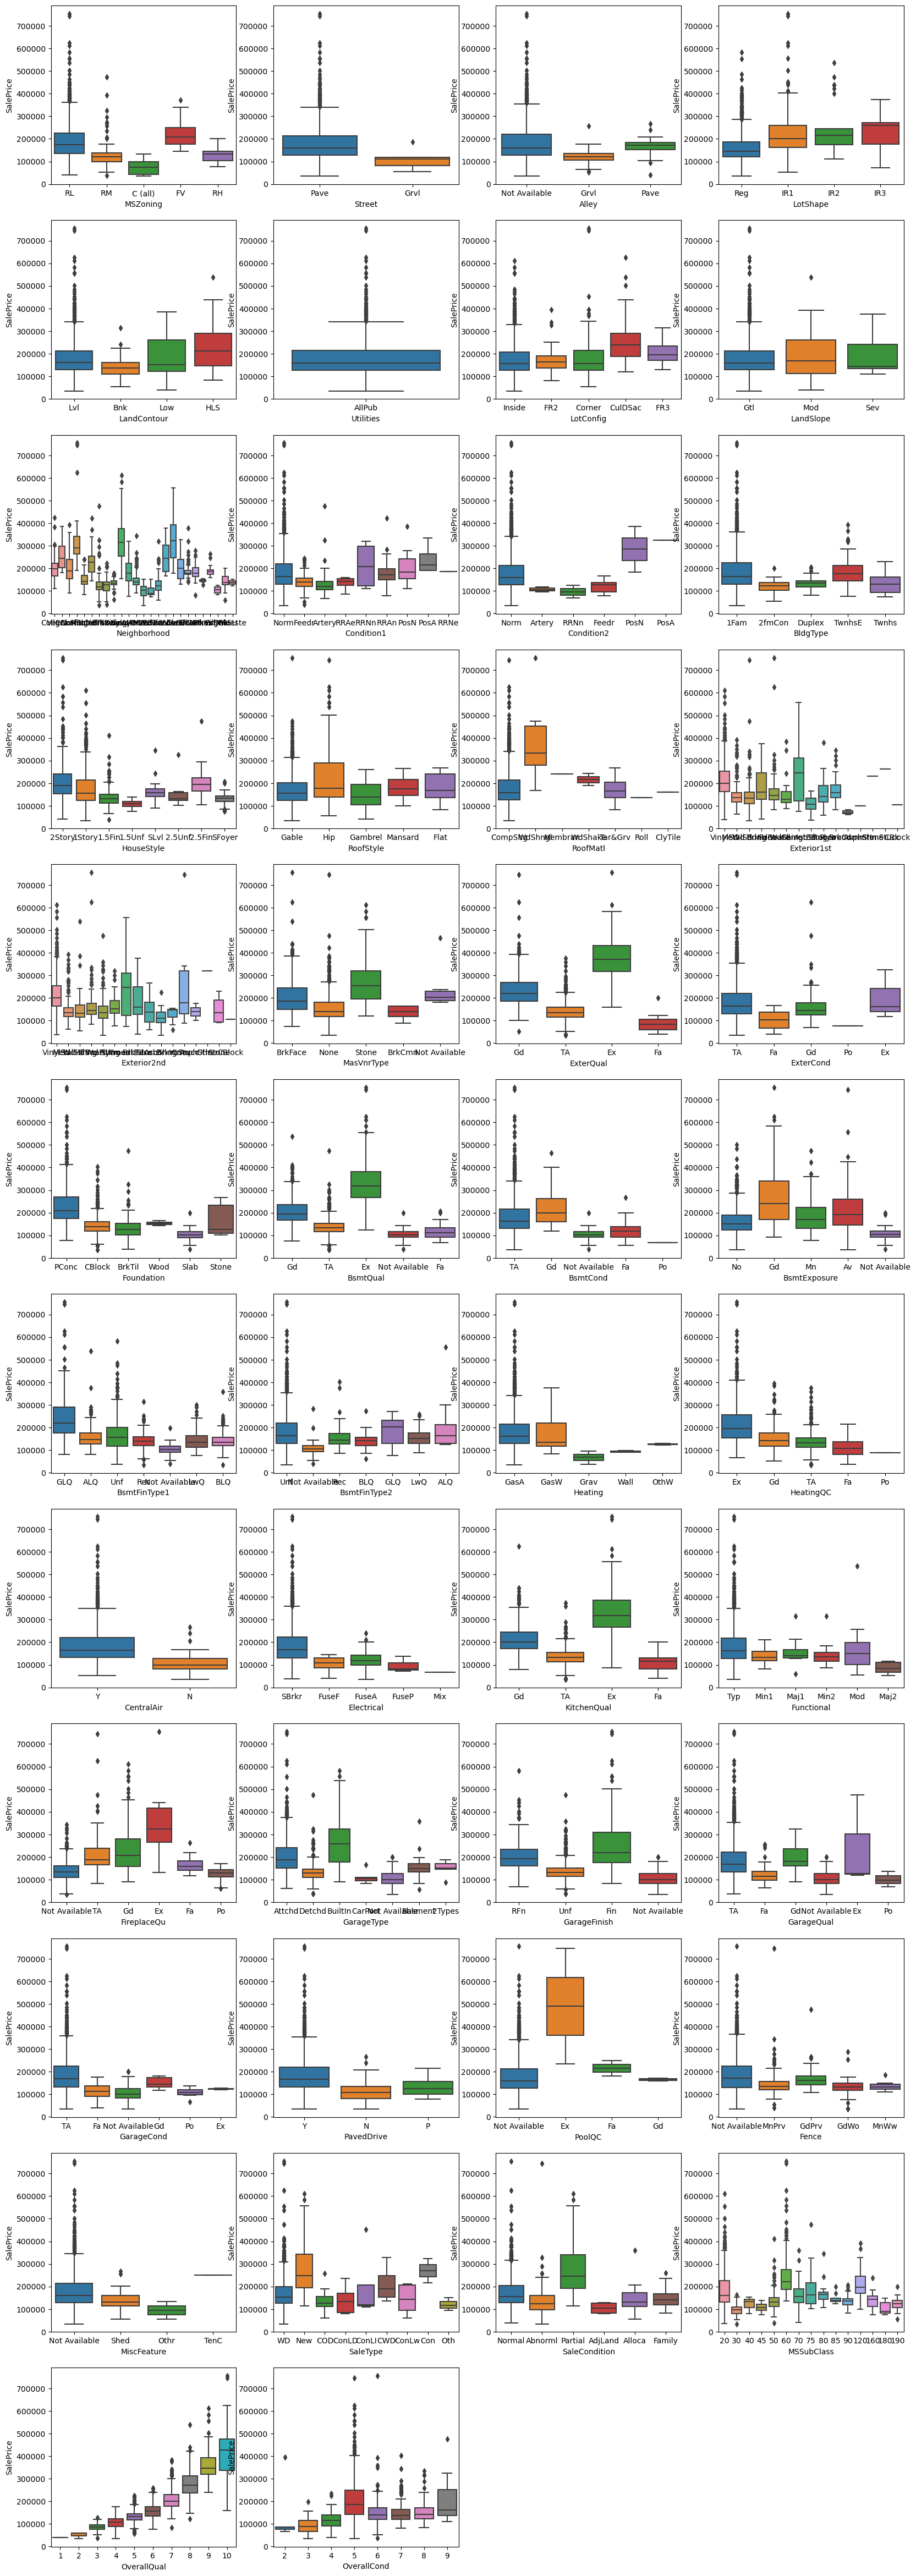

In [35]:
# Set the number of columns for the grid
num_columns = 4

# Calculate the number of rows needed to accommodate all features
cat_features = categorical_features.shape[1]
num_rows = (cat_features - 1) // num_columns + 1

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 5, num_rows * 5))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = [axes]

# Plot pairwise scatterplots
for i, column in enumerate(categorical_features.columns):
    sns.boxplot(x=column, y='SalePrice', data=categorical_features.join(y), ax=axes[i // num_columns, i % num_columns])

# Remove any empty subplots
for i in range(cat_features, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

From the above boxplot we could observe that the majority of the categorical predictors seems to have some positive relationship with the SalePrice indicating that these features could be used to predict the difference in SalePrice given the various categorical features. However there are couple of predictors that might not be as useful to predict the SalePrice due to the feature only have one level or the difference between levels in that particular features does not differ very much, those features are: **'LandSlope' and 'Utilities'**. These features will be taken into consideration for feature selection in the later section.

We will now check whether there are heavy correlation between numerical features that might cause multicollinearity when building the Multiple Linear Regression model.

### 4.3 Correlation Between Numerical Features

**4.3.1 Pairwise Correlation Between Numerical Features**

In [36]:
enable_plotly_in_cell

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create the heatmap using Plotly
fig = px.imshow(correlation_matrix, x=numeric_features.columns, y=numeric_features.columns,
                color_continuous_scale='RdBu', title='Correlation Heatmap')
fig.show()

Referring to the "Regression Diagnostics: Identifying Influential Data and Sources of Collinearity" book written by Belsley et al, we could use the correlation threshold of 0.7 to distinguish the independent features that might pose the risk of multicollinearity and based on this threshold, there are couple of features that might pose risk of multicollinearity which are **'GrLivArea' & 'TotRmsAbvGrd', '2ndFlrSF' & 'GrLivArea', 'TotalBsmtSF' & '1stFlrSF', 'GarageCars' & 'GarageArea'**.

In order to confirm it, we will conduct Variance Inflation Factor (VIF) to validate the finding.

**4.3.2 Variance Inflation Factor (VIF) Between Numerical Features**

The Variance Inflation Factor (VIF) is a statistical measure used to assess multicollinearity in a regression model. Multicollinearity occurs when two or more independent variables are highly correlated, making it challenging to interpret their individual effects.

VIF quantifies how much the variance of an estimated regression coefficient increases when a particular predictor is included in the model compared to when it is excluded. A VIF of 1 indicates no multicollinearity, while values above 1 suggest increasing levels of multicollinearity.

The formula for VIF is **VIF_i = 1 / (1 - R²_i)**

The VIF value represents how much the variance of the coefficient of "X_i" is inflated due to multicollinearity. If there is no multicollinearity, the VIF will be 1, indicating that the variance of the coefficient is not affected by correlations with other predictors. However, as the correlation between "X_i" and other predictors increases, the VIF value will rise, indicating more severe multicollinearity.

**Interpretation of VIF values:**
- VIF = 1: No multicollinearity (perfectly uncorrelated with other predictors).
- VIF between 1 and 5: Low to moderate multicollinearity (usually acceptable).
- VIF above 5: High multicollinearity (may require further investigation or remediation).

High VIF values indicate that a predictor is highly correlated with other predictors, making it challenging to interpret its independent contribution accurately. In such cases, addressing multicollinearity is important, such as removing correlated predictors or using dimensionality reduction techniques.

We will investigate the VIF for numerical features below.

In [37]:
# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
pd.options.display.float_format = '{:.2f}'.format

# Display VIF results
print(vif_data.sort_values(by='VIF',ascending=False))

          Feature      VIF
9        1stFlrSF      inf
8     TotalBsmtSF      inf
12      GrLivArea      inf
11   LowQualFinSF      inf
10       2ndFlrSF      inf
5      BsmtFinSF1      inf
6      BsmtFinSF2      inf
7       BsmtUnfSF      inf
31         YrSold 19197.98
3    YearRemodAdd 16537.37
2       YearBuilt 12261.87
19   TotRmsAbvGrd    81.39
22     GarageCars    38.76
23     GarageArea    31.94
21    GarageYrBlt    30.19
18   KitchenAbvGr    29.82
17   BedroomAbvGr    29.37
15       FullBath    26.43
0     LotFrontage    14.94
13   BsmtFullBath     3.54
1         LotArea     3.48
16       HalfBath     3.37
20     Fireplaces     2.84
4      MasVnrArea     1.89
24     WoodDeckSF     1.88
25    OpenPorchSF     1.86
26  EnclosedPorch     1.45
28    ScreenPorch     1.22
14   BsmtHalfBath     1.19
29       PoolArea     1.16
30        MiscVal     1.09
27      3SsnPorch     1.04


VIF analysis showed that there are multiple of numerical features that exhibited very high VIF thus indicating high risk of multicollinearity when loaded into Multiple Linear Regression Model. Using threshold of 10 for VIF, these features poses high risk of multicollinearity: **1stFlrSF, TotalBsmtSF, GrLivArea, LowQualFinSF, 2ndFlrSF, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, YrSold, YearRemodAdd, YearBuilt, TotRmsAbvGrd, GarageCars, GarageArea, GarageYrBlt, KitchenAbvGr, BedroomAbvGr, FullBath, LotFrontage**

Combining this information with the information from the pairwise correlation and the visual relation between response and features, I will remove these numerical features and re-perform VIF before loading it up into the MLR model: **'YrSold', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'BsmtFinSF2', 'GarageCars', 'YearRemodAdd', 'YearBuilt', and 'GarageYrBlt'.**

We will also perform Stepwise Regression to also perform additional feature selection after fitting the dataset into MLR in later section.

In [38]:
numeric_features_new = numeric_features.drop(columns=['YrSold', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 
                                                      'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'BsmtFinSF2', 
                                                      'GarageCars','YearRemodAdd','GarageYrBlt','YearBuilt'])

In [39]:
# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features_new.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(numeric_features_new.values, i) for i in range(numeric_features_new.shape[1])]
pd.options.display.float_format = '{:.2f}'.format

# Display VIF results
print(vif_data.sort_values(by='VIF',ascending=False))

          Feature   VIF
9    BedroomAbvGr 17.53
7        FullBath 14.63
10   KitchenAbvGr 14.47
0     LotFrontage 13.55
12     GarageArea  9.24
3      BsmtFinSF1  5.37
4       BsmtUnfSF  5.32
1         LotArea  3.34
5    BsmtFullBath  3.18
11     Fireplaces  2.49
8        HalfBath  1.90
13     WoodDeckSF  1.83
14    OpenPorchSF  1.76
2      MasVnrArea  1.73
15  EnclosedPorch  1.22
17    ScreenPorch  1.19
6    BsmtHalfBath  1.15
18       PoolArea  1.09
19        MiscVal  1.07
16      3SsnPorch  1.04


The VIF value for the selected numerical features seems low enough compared to the previous VIF value before the removal of the high VIF value features. For this analysis, I will use these combination of features to load into MLR and perform further feature selection using Stepwise Regression.

Please note that for categorical features, the complete feature selection will be done through the Stepwise Regression since there is no straightforward method that is analogous to the VIF in numerical features.

## 5. Multiple Linear Regression Modeling

We will now fit the MLR model using the dataset with features preliminary selected during the previous analysis and check for the model performance. For this analysis, this model will be referred to as <code>base model</code>

### 5.1 Preparing Dataset for MLR Modeling Given the Previous Analysis

In [40]:
# Defining Features
numeric_features.reset_index(drop=True, inplace=True)
categorical_features.reset_index(drop=True, inplace=True)
X = pd.concat([numeric_features, categorical_features], axis=1)

In [41]:
# Removing features as per previous analysis
X = X.drop(columns=['YrSold', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
                       'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'BsmtFinSF2', 
                       'GarageCars','YearRemodAdd','GarageYrBlt','YearBuilt','Utilities', 'LandSlope'])

In [42]:
# Dummifying Categorical Features
X = pd.get_dummies(X, drop_first=True)

In [43]:
# Checking the number of Features after Dummification
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Columns: 264 entries, LotFrontage to OverallCond_9
dtypes: float64(2), int64(18), uint8(244)
memory usage: 474.0 KB


In [44]:
# Splitting the Features and Response into 70% Training and 30% Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=296)

### 5.2 Fitting the MLR using Training Set

In [45]:
# Training the MLR model on training set
base_model = LinearRegression()
base_model.fit(X_train,y_train)

LinearRegression()

In [46]:
# Creating Prediction on test set
y_pred_base_model = base_model.predict(X_test)

### 5.3 Evaluating Model Performance

In [47]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_base_model)
mse = mean_squared_error(y_test, y_pred_base_model)
rmse = mean_squared_error(y_test, y_pred_base_model, squared=False)
r2 = r2_score(y_test, y_pred_base_model)

# Display the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 24125.98192970704
Mean Squared Error (MSE): 3411215062.296772
Root Mean Squared Error (RMSE): 58405.60814080076
R-squared (R²): 0.474477543732041


The Multiple Linear Regression fitted on the selected numerical features previously screened using VIF and the rest of the categorical features performed quite decent but not quite satisfactory as it could only explain around 47% of the variability within the dataset.

We will now try to perform further feature selection using Stepwise Regression (Forward and Backward) using statsmodel and mlextend package in an attempt to decrease the RMSE as well as increasing the R-Squared.

## 6. Forward Stepwise Regression for Feature Selections

Stepwise regression is a feature selection technique used to build a regression model by iteratively selecting or removing features from the model based on certain statistical criteria. It aims to find the best subset of features that provides the most accurate predictions while avoiding overfitting.

There are two main types of stepwise regression: forward stepwise regression and backward stepwise regression.

**1. Forward Stepwise Regression:**

- Start with an empty model that includes only the intercept.

- Add one feature at a time to the model, selecting the feature that results in the best improvement in model fit (e.g., higher R-squared or lower error).

- Continue adding features until a stopping criterion is met (e.g., no more statistically significant features to add or a predefined number of features is reached).

**2. Backward Stepwise Regression:**
- Start with a full model that includes all features.

- Remove one feature at a time from the model, selecting the feature to remove based on the least contribution to model fit (e.g., higher p-values or lower reduction in model performance).

- Continue removing features until a stopping criterion is met (e.g., all remaining features are statistically significant or a predefined number of features is reached).

Both forward and backward stepwise regression use some statistical measure (e.g., adjusted R-squared, AIC, BIC, p-values) to evaluate the model's fit and the importance of each feature. The goal is to find a balance between model complexity and accuracy, ensuring that the final model has the best predictive power without unnecessary overfitting.

*Please note that for this analysis, I will use R-squared as the statistical measure and significance level of 0.05 to define the selection on the subset of features and also use the Forward Stepwise Regression.*

**6.1 Forward Stepwise Regression using <code>statsmodel</code> Package**

The MLR model built using the features selected from the Stepwise Regression using <code>statsmodel</code> package will be referred to as <code>model_sm</code>

In [48]:
# Reset the indices of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Add a constant column to X for the intercept term
X_train = sm.add_constant(X_train)

# Stepwise forward feature selection
def forward_feature_selection(X, y, significance_level=0.05):
    # Setting the initial condition
    remaining_features = set(X.columns)
    selected_features = []
    current_score = 0.0
    
    # Looping through all of the available predictors
    while len(remaining_features) > 0:
        scores_with_candidates = []
        # Fitting the linear regression and store the adjusted R-squared value with all available predictors one by one
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_features + [feature]]))).fit()
            score = model.rsquared
            scores_with_candidates.append((score, feature))
        
        # Sorting the score
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_feature = scores_with_candidates.pop(0)
        
        # Choosing the combination of predictors based on the highest adjusted R-squared score
        if current_score < best_new_score:
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
            current_score = best_new_score
        else:
            break
    
    # Fitting the linear regression model with the best combination of features
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_features]))).fit()
    return model, selected_features

<font color=darkred>**Please note that before running below code cells, the time taken to complete the computation was around 1626 seconds ~ 28 minutes**</font>

In [49]:
# Record the start time
start_time = time.time()

# Perform forward stepwise regression on training set
model_forward, selected_features_forward = forward_feature_selection(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("")
print(f"Elapsed time: {elapsed_time:.6f} seconds")


Elapsed time: 1626.735968 seconds


In [50]:
# Print results
print("\nModel Summary:")
print(model_forward.summary())

print("")

print("Selected Features in Forward Stepwise Regression:")
print("")
print(selected_features_forward)


Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     42.21
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.94e-271
Time:                        16:52:57   Log-Likelihood:                -9495.8
No. Observations:                 840   AIC:                         1.949e+04
Df Residuals:                     593   BIC:                         2.065e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cons

The number of predictors decreased from previously 264 (after dummification of categorical features) into 246. We will now build another MLR model with the combination of the best features and evaluate the model performance against the test set.

In [51]:
# Subsetting the Predictors using the best combination of features
X_train_sm = X_train[selected_features_forward]
X_test_sm = X_test[selected_features_forward]

In [52]:
model_sm = LinearRegression()
model_sm.fit(X_train_sm,y_train)

LinearRegression()

In [53]:
# Creating Prediction on test set
y_pred_sm = model_sm.predict(X_test_sm)

In [54]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_sm)
mse = mean_squared_error(y_test, y_pred_sm)
rmse = mean_squared_error(y_test, y_pred_sm, squared=False)
r2 = r2_score(y_test, y_pred_sm)

# Display the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 24104.967342728156
Mean Squared Error (MSE): 3408762712.2648325
Root Mean Squared Error (RMSE): 58384.610234759915
R-squared (R²): 0.47485534606607094


The MLR model built using features as a result from feature selection of stepwise regression using statsmodel package returned a relatively same model performance. R-Squared value increased only around 0.1% from the model without stepwise regression feature selection.

We will now try to use mlextend package to perform feature selection and compare the model performance.

**6.2 Forward Stepwise Regression using <code>mlextend</code> Package**

The MLR model built using the features selected from the Stepwise Regression using <code>mlextend</code> package will be referred to as <code>model_ml</code>

<font color=darkred>**Please note that below code cell takes approximately 893 seconds to run ~ 15 mins**</font>

In [55]:
# Record the start time
start_time = time.time()

# Stepwise forward feature selection
model_forward = LinearRegression()
sfs_forward = SequentialFeatureSelector(model_forward,
                                        k_features='best',
                                        forward=True,
                                        scoring='r2',
                                        cv=5)
sfs_forward.fit(X_train, y_train)
selected_features_forward = list(X_train.columns[list(sfs_forward.k_feature_idx_)])

print("Forward Stepwise Regression:")
print("Selected Features:", selected_features_forward)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("")
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Forward Stepwise Regression:
Selected Features: ['const', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RL', 'Street_Pave', 'LandContour_Low', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_RRAn', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Mansard', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exte

In [56]:
len(selected_features_forward)

104

The number of predictors decreased from previously 264 (after dummification of categorical features) into 103. We will now build another MLR model with the combination of the best features and evaluate the model performance against the test set.

In [57]:
features = selected_features_forward[1:]
X_train_ml = X_train[features]
X_test_ml = X_test[features]

In [58]:
model_ml = LinearRegression()
model_ml.fit(X_train_ml,y_train)

LinearRegression()

In [59]:
# Creating Prediction on test set
y_pred_ml = model_ml.predict(X_test_ml)

In [60]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_ml)
mse = mean_squared_error(y_test, y_pred_ml)
rmse = mean_squared_error(y_test, y_pred_ml, squared=False)
r2 = r2_score(y_test, y_pred_ml)

# Display the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 22863.972546783436
Mean Squared Error (MSE): 2491410398.651759
Root Mean Squared Error (RMSE): 49914.03007824312
R-squared (R²): 0.6161801327795906


The features resulted from the <code>mlextend</code> package stepwise regression returned an even higher R-squared value from the base MLR and the statsmodel feature selection MLR with around 32% increase from the base MLR and 31% from the statsmodel feature selection MLR.

## 7. Polynomial Multiple Linear Regression

Other than the feature selection using stepwise regression and VIF that previously discussed, we will now try to fit another MLR model using Polynomial of degree 2 using all of the features. This is due to the fact that there are couples of numerical predictor that seemingly have quadratic relationship with the SalePrice. This model will be referred to as <code>model_pl</code>.

**7.1 Preparing Dataset for Polynomial MLR**

In [61]:
quadratic = PolynomialFeatures(2, include_bias=False)
X_train_quadratic = quadratic.fit_transform(X_train.drop(columns='const'))
X_test_quadratic = quadratic.transform(X_test)

**7.2 Fitting the Linear Model on the Transformed Features**

In [62]:
model_pl = LinearRegression()
model_pl.fit(X_train_quadratic, y_train)

LinearRegression()

**7.3 Evaluating the Model Performance on Test Set**

In [63]:
y_pred_pl = model_pl.predict(X_test_quadratic)

In [64]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_pl)
mse = mean_squared_error(y_test, y_pred_pl)
rmse = mean_squared_error(y_test, y_pred_pl, squared=False)
r2 = r2_score(y_test, y_pred_pl)

# Display the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 78113.00830424526
Mean Squared Error (MSE): 195076371198.62335
Root Mean Squared Error (RMSE): 441674.5082055601
R-squared (R²): -29.05293183805185


The <code>model_pl</code> fitted using Polynomial of Degree 2 MLR does not perform very well indicated by the much higher error compared to the previous three models. It might implies that the features and its relationship with the response could not be well explained using the Polynomial of Degree 2 (quadratic).

## 8. Summary of Model Performance

We have evaluated the performance of three different regression models: `base_model`, `model_sm`, and `model_ml`. Here is a summary of their performance metrics:

| Model         | Mean Absolute Error (MAE) | Mean Squared Error (MSE)   | Root Mean Squared Error (RMSE) | R-squared (R²) |
|---------------|--------------------------:|--------------------------:|-------------------------------:|--------------:|
| base_model    |                  24125.98 |               3411215062.30 |                    58405.61    |         0.47  |
| model_sm      |                  24104.97 |               3408762712.26 |                    58384.61    |         0.47  |
| model_ml      |                  22863.97 |               2491410398.65 |                    49914.03    |         0.62  |
| model_pl      |                  78113.00 |               195076371198.6|                    441674.50   |         -29.0 |

Among these models, the `model_ml` exhibits the lowest Mean Absolute Error and Root Mean Squared Error, along with the highest R-squared value. This suggests that the `model_ml` performs better compared to the other two models in terms of predictive accuracy.

The features used in by the best model are as follow:

In [65]:
best_features = selected_features_forward[1:]

In [66]:
print(best_features)

['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RL', 'Street_Pave', 'LandContour_Low', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_RRAn', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Mansard', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa'

## 9. Sale Price Prediction on Ames Housing Test Set

We will now try to predict the House Sale Price using the feature information given in the test set.

**9.1 Importing and Adjusting Dataset**

In [67]:
test_set = pd.read_csv('test.csv')

In [68]:
test_set.set_index('Id', inplace=True)

In [69]:
test_set[['MSSubClass', 'OverallQual', 'OverallCond']] = test_set[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

**9.2 Handling Missing Values**

In [70]:
numerical_columns = test_set.select_dtypes(include=['int64', 'float64'])
categorical_columns = test_set.select_dtypes(include=['object'])

In [71]:
categorical_columns.isna().sum()

MSSubClass          0
MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondit

In [72]:
not_available = ['Alley','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                 'GarageType','GarageFinish', 'GarageQual', 'GarageCond','PoolQC', 'Fence', 'MiscFeature'] 

for col in not_available:
    categorical_columns[col].fillna('Not Available', inplace=True)

In [73]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

real_missing = ['MSZoning', 'Utilities', 'Exterior1st','Exterior2nd', 'MasVnrType', 'KitchenQual', 'Functional', 'SaleType']
categorical_columns[real_missing] = categorical_imputer.fit_transform(categorical_columns[real_missing])

In [74]:
for col in categorical_columns:
    num_categories = categorical_columns[col].unique()
    print(f"Column '{col}' has unique categories: {num_categories}")

Column 'MSSubClass' has unique categories: [20 60 120 160 80 30 50 90 85 190 45 70 75 180 40 150]
Column 'MSZoning' has unique categories: ['RH' 'RL' 'RM' 'FV' 'C (all)']
Column 'Street' has unique categories: ['Pave' 'Grvl']
Column 'Alley' has unique categories: ['Not Available' 'Pave' 'Grvl']
Column 'LotShape' has unique categories: ['Reg' 'IR1' 'IR2' 'IR3']
Column 'LandContour' has unique categories: ['Lvl' 'HLS' 'Bnk' 'Low']
Column 'Utilities' has unique categories: ['AllPub']
Column 'LotConfig' has unique categories: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
Column 'LandSlope' has unique categories: ['Gtl' 'Mod' 'Sev']
Column 'Neighborhood' has unique categories: ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Column 'Condition1' has unique categories: ['Feedr' 'Norm' 'PosN' 'RRNe' 'Art

In [75]:
numerical_columns.isna().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
MoSold             0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
EnclosedPorch      0
MiscVal            0
Fireplaces         0
PoolArea           0
ScreenPorch        0
HalfBath           0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
LotArea            0
FullBath           0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
YrSold             0
dtype: int64

In [76]:
continous = ['LotFrontage','BsmtFinSF1','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns[continous] = numerical_imputer.fit_transform(numerical_columns[continous])

In [77]:
discrete = ['GarageYrBlt','BsmtHalfBath','BsmtFullBath','GarageCars','GarageArea']
numerical_imputer = SimpleImputer(strategy='most_frequent')
numerical_columns[discrete] = numerical_imputer.fit_transform(numerical_columns[discrete])

**9.3 Preparing Dataset for Model Prediction**

In [78]:
numerical_columns.reset_index(drop=True, inplace=True)
categorical_columns.reset_index(drop=True, inplace=True)

X_test = pd.concat([numerical_columns, categorical_columns], axis=1)

In [79]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [80]:
# Identify missing columns from best_features in the test_set
missing_columns = [col for col in best_features if col not in X_test.columns]

# Add missing columns with zero values
for col in missing_columns:
    X_test[col] = 0

In [81]:
X_test=X_test[best_features]

**9.4 Predicting House Sale Price in Ames Test Set**

In [82]:
y_pred = model_ml.predict(X_test)

In [83]:
price_prediction = pd.DataFrame({'Id': test_set.index, 'SalePrice': y_pred.tolist()})

In [84]:
price_prediction.to_csv('price_prediction.csv', index=False)

## 10. Conclusion

Based on the model development, it is apparent that Multiple Linear Regression fitted on the training set using <code>mlextend</code> package that is scikit learning friendly returned the highest performance indicated by the highest R-Squared as well as the lowest Error measures compared to the other models.

The features used in the best model are as follows and were used to construct the predictive model to predict the house sale price in Ames, Iowa.

['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RL', 'Street_Pave', 'LandContour_Low', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_RRAn', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Mansard', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'Foundation_PConc', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_Unf', 'Heating_Grav', 'Heating_Wall', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'Electrical_FuseF', 'Electrical_Mix', 'KitchenQual_Gd', 'Functional_Min1', 'FireplaceQu_Not Available', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Not Available', 'GarageFinish_Not Available', 'Fence_MnWw', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleCondition_Normal', 'MSSubClass_30', 'MSSubClass_85', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7']